This analysis is in the order of Female then Male

In [1]:
install.packages('qtl') #Main package, for analysis
install.packages('qtlcharts') #accessory, for displaying graphs
install.packages('LinkageMapView') #accessory, for displaying linkage maps
install.packages('rcompanion')# for plotNormalHistogram

Warning message in install.packages("qtl"):
"'lib = "C:/Program Files/R/R-3.6.1/library"' is not writable"


ERROR: Error in install.packages("qtl"): unable to install packages


In [1]:
library(qtl) #load packages
library(qtlcharts)
library(LinkageMapView)
library(rcompanion)

In [2]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  FemaleMap.csv
First Genotype (homozygous) (For example ll):  ll
Second Genotype (heterozygous) (for example lm):  lm
Column Number:  36


 --Read the following data:
	 294  individuals
	 1100  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,2,4,5,7,8,9,10,11,12,13,14,16,17,18,19; use jittermap()."


 --Cross type: bc 


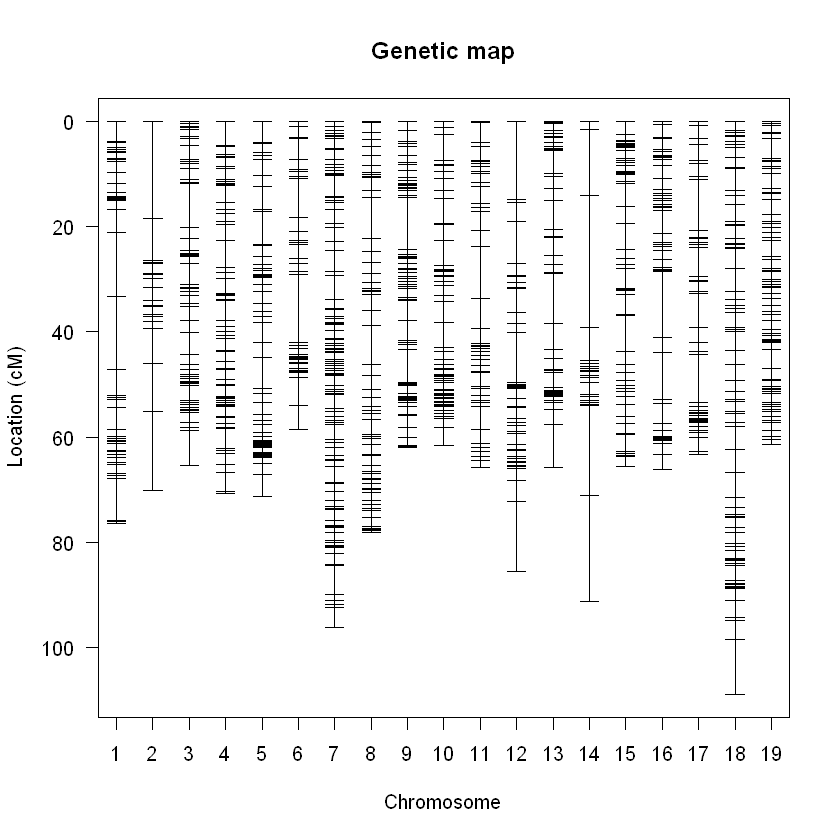

In [3]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

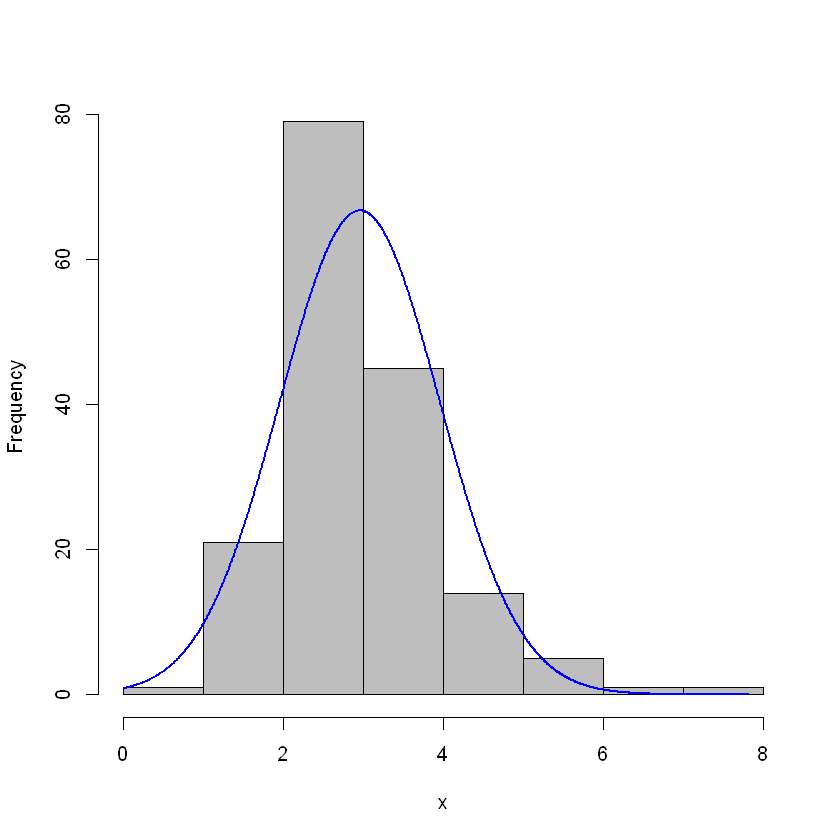

In [4]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this dataset. Will need to be analyized. 

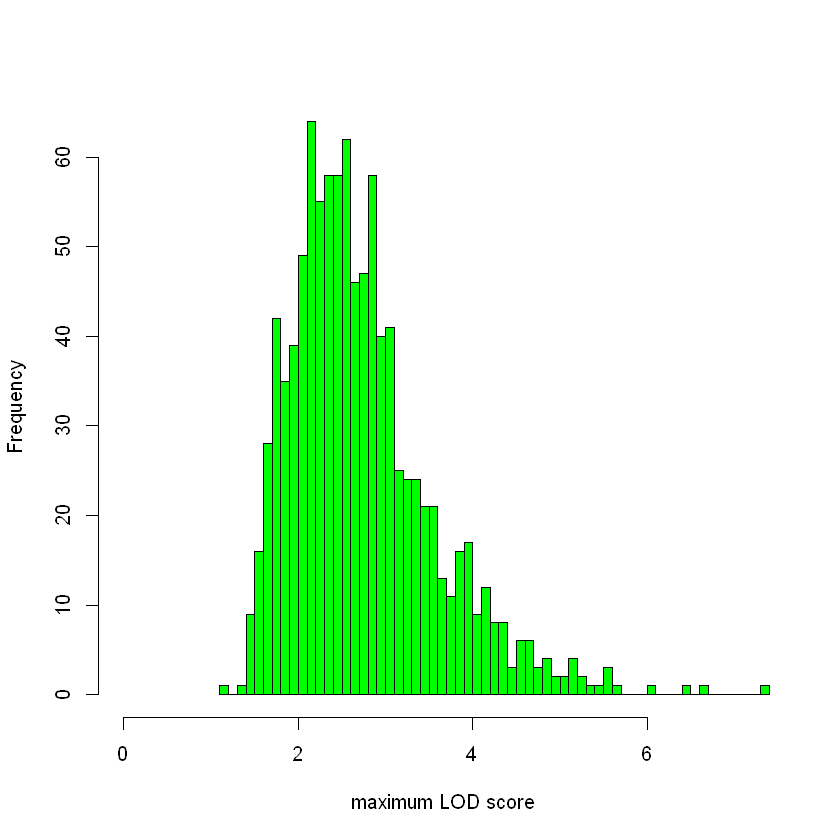

In [5]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c1.loc28,1,28.000000,1.1406118
2_2798731,2,28.890007,0.4470398
c3.loc2,3,2.000000,1.4311485
4_17758080,4,47.182041,1.9167850
c5.loc43,5,43.000000,1.7657139
6_1668270,6,1.023001,0.6619490
c7.loc86,7,86.000000,0.9007015
c8.loc24,8,24.000000,0.4066362
c9.loc41,9,41.000000,1.2055068


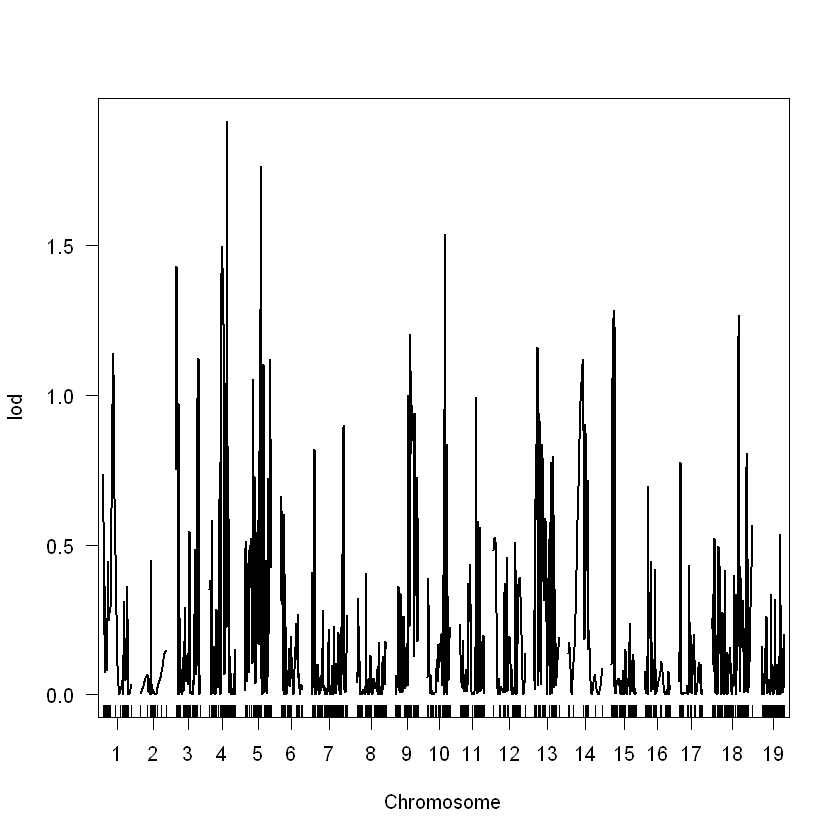

In [6]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)

Chromosome?  4
Would you like to investigate 
                  another chromosome? (Y/N):  N


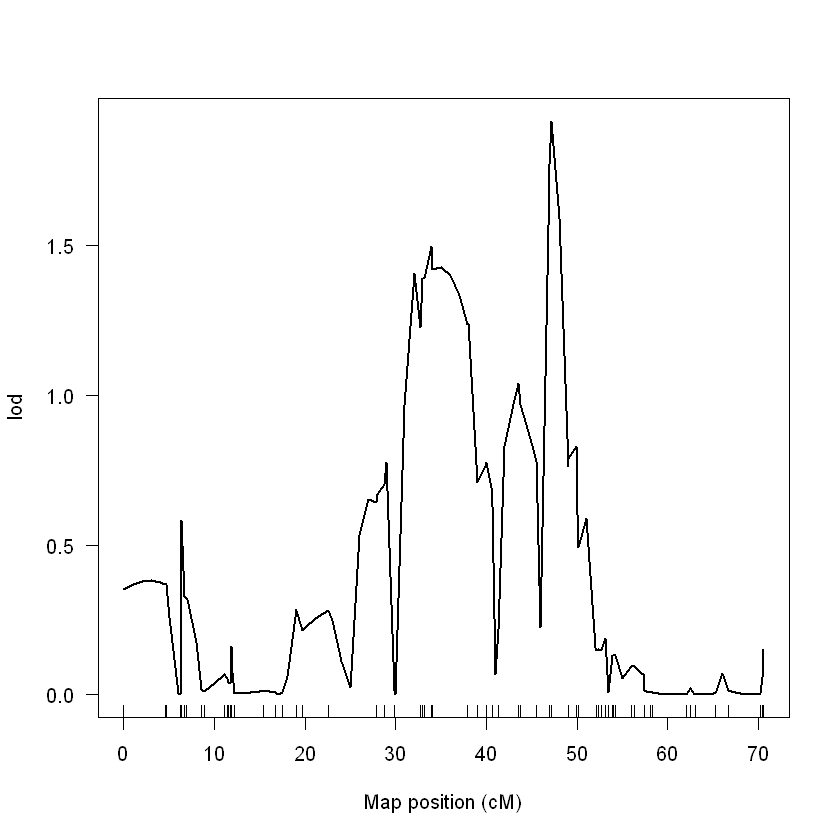

In [7]:
#Chromosomal Analysis
cont = 'Y' #Run loop on first run through
while(cont == 'Y'){
  chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
  plot(TraitCIM, chr = chr) #Plot chr LOD scores
  abline(h = LOD5, col = "blue") #Statistically Significant
  cont = readline("Would you like to investigate 
                  another chromosome? (Y/N): ") #Y if multiple
                  #chromosomes are to be investigated
}

In [8]:
bay <- scanone(Map, method = 'hk') #scan genome with sQTL model
bayesint(bay, chr = chr, prob=0.95, 
         expandtomarkers=TRUE) #calculate bayesian interval
lodint(bay, chr = chr,expandtomarkers = TRUE ) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
4_4708744,4,16.66202,1.243756
c4.loc40,4,40.00000,2.855691
4_21750541,4,65.25306,1.429064


,chr,pos,lod
,<fct>,<dbl>,<dbl>
4_5019318,4,18.98402,0.7091372
c4.loc40,4,40.00000,2.8556915
4_22218751,4,66.68706,0.9319039


In [9]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  40


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 127 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 167 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df         SS        MS       LOD      %var Pvalue(Chi2) Pvalue(F)
Model   1   1.108569 1.1085692 0.2434272 0.6690237    0.2896981 0.2933355
Error 165 164.590978 0.9975211                                           
Total 166 165.699547                                                     


Estimated effects:
-----------------
              est      SE      t
Intercept 2.97764 0.08134 36.605
4@40.0    0.17988 0.17063  1.054


In [10]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  MaleMap.csv
First Genotype (homozygous) (For example ll):  nn
Second Genotype (heterozygous) (for example lm):  np
Column Number:  36


 --Read the following data:
	 294  individuals
	 1128  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19; use jittermap()."


 --Cross type: bc 


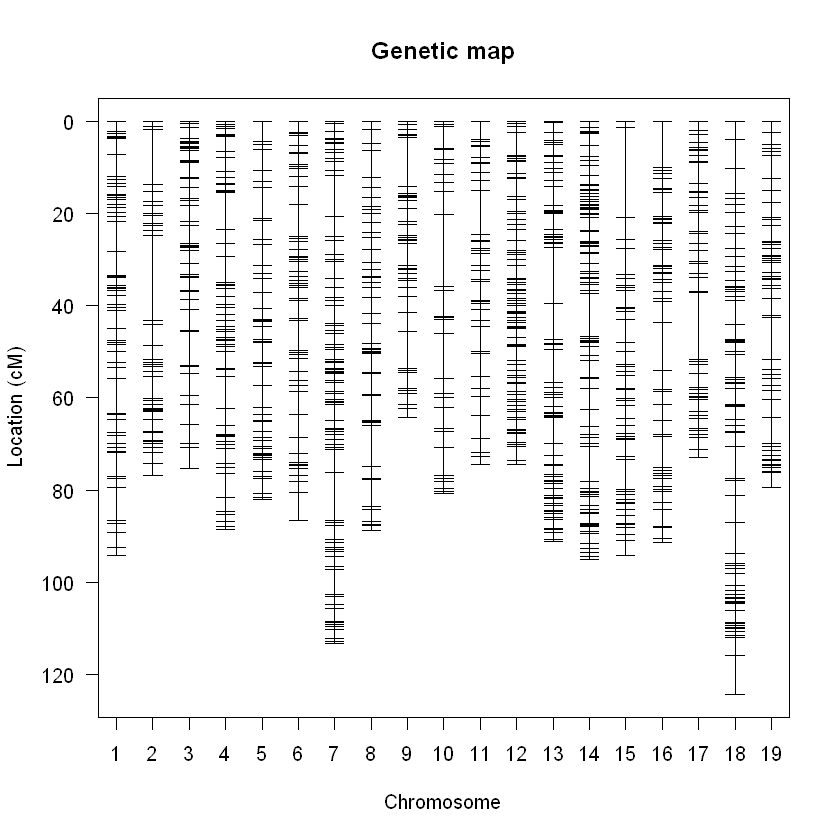

In [11]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

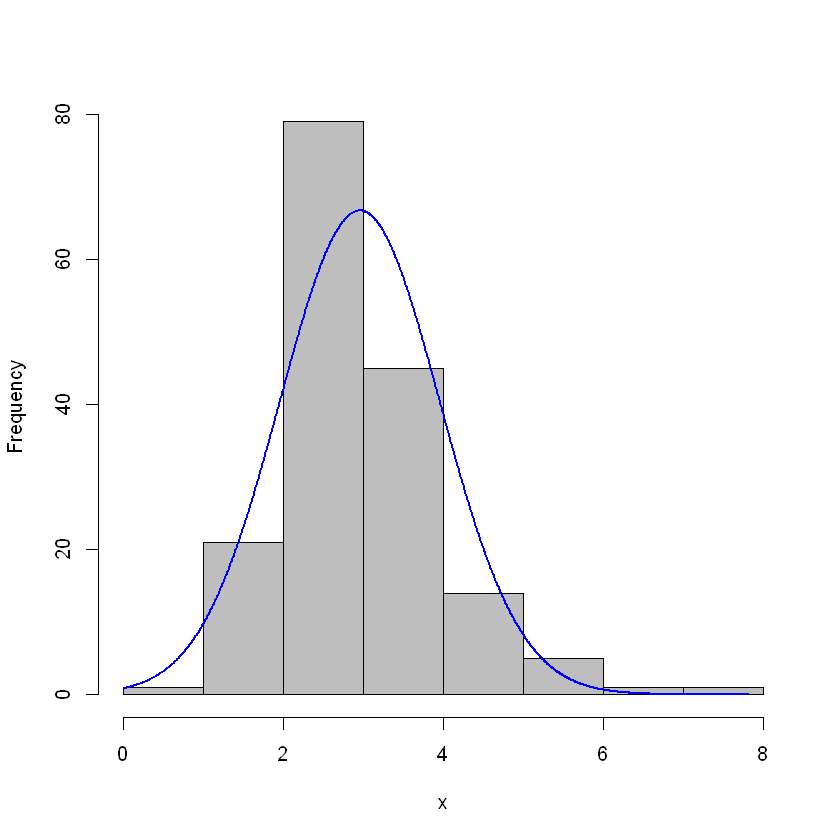

In [12]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this data. 

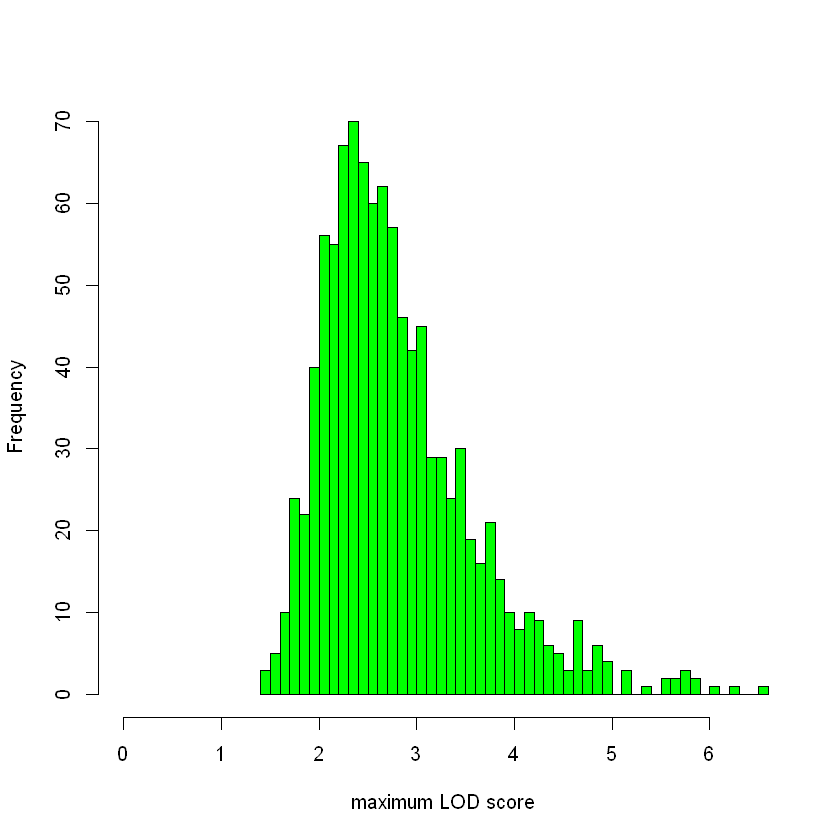

In [13]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c1.loc91,1,91.00000,1.5943548
c2.loc15,2,15.00000,0.6511318
c3.loc54,3,54.00000,0.9104064
c4.loc25,4,25.00000,0.5226563
18_30393961,5,21.53601,0.8668354
c6.loc61,6,61.00000,1.7813986
c7.loc87,7,87.00000,4.2231054
c8.loc22,8,22.00000,1.2748990
c9.loc44,9,44.00000,0.9276300


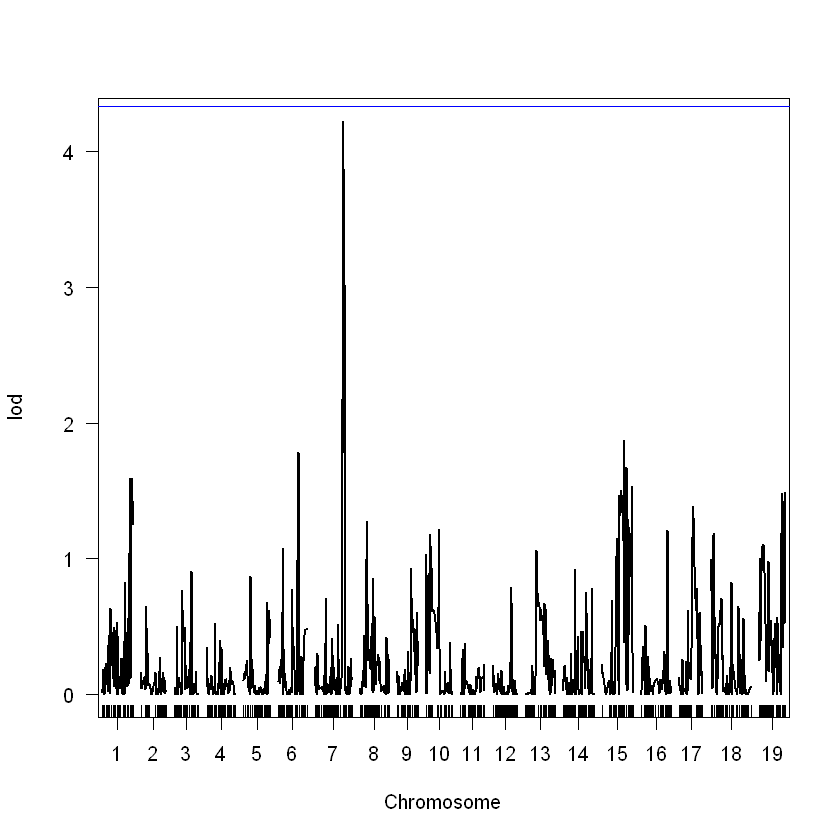

In [14]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)

Chromosome?  7
Would you like to investigate 
                  another chromosome? (Y/N):  N


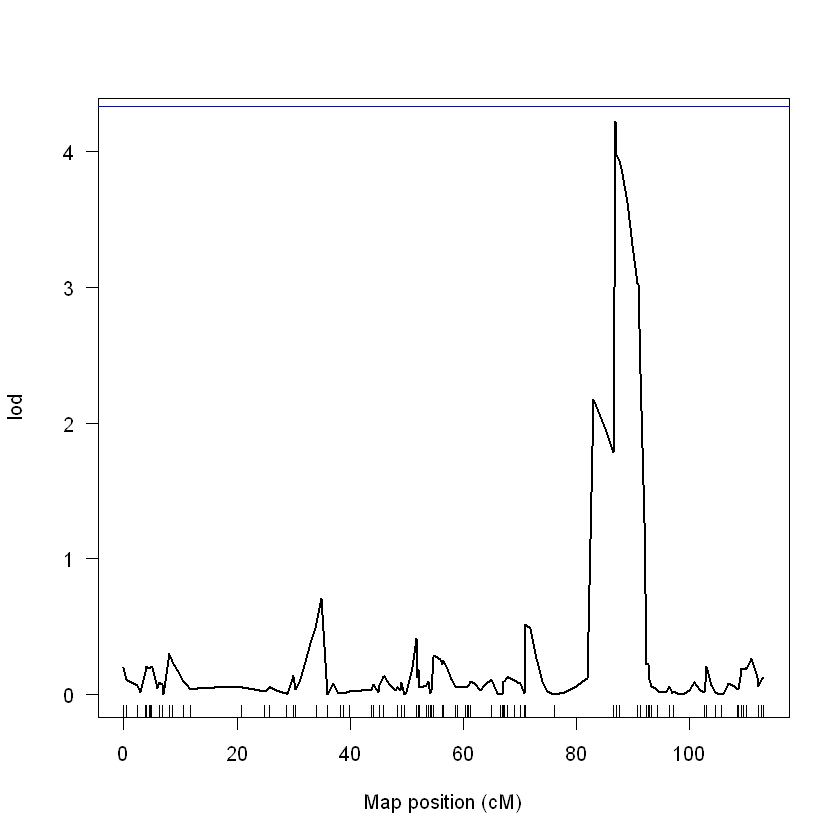

In [15]:
#Chromosomal Analysis
cont = 'Y' #Run loop on first run through
while(cont == 'Y'){
  chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
  plot(TraitCIM, chr = chr) #Plot chr LOD scores
  abline(h = LOD5, col = "blue") #Statistically Significant
  cont = readline("Would you like to investigate 
                  another chromosome? (Y/N): ") #Y if multiple
                  #chromosomes are to be investigated
}

In [17]:
#change to chromosome of interest below:
bayesint(TraitCIM, chr = 7) #calculate bayesian interval
lodint(TraitCIM, chr = 7) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
c7.loc87,7,87.00000,4.223105
c7.loc87,7,87.00000,4.223105
7_22634499,7,90.80007,3.028297


,chr,pos,lod
,<fct>,<dbl>,<dbl>
7_22156653,7,86.52607,1.786523
c7.loc87,7,87.00000,4.223105
7_22735436,7,91.44807,2.364542


In [18]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  87


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 127 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 167 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df         SS       MS      LOD     %var Pvalue(Chi2)   Pvalue(F)
Model   1   9.562353 9.562353 2.155548 5.770899  0.001629012 0.001765877
Error 165 156.137194 0.946286                                           
Total 166 165.699547                                                    


Estimated effects:
-----------------
               est       SE      t
Intercept  2.93793  0.07539 38.972
7@87.0    -0.69546  0.21878 -3.179
